In [1]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import sharpe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

In [2]:
# Fetching baseline data
ports = cr.fetch_returns('garch', range(10000))

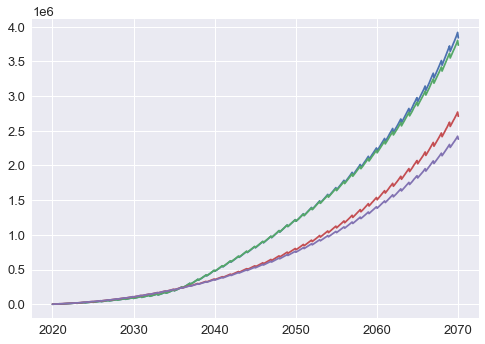

In [82]:
plt.plot(ports.groupby(level=1).mean().loc[:, ['dual_phase', 'single_phase', '100', '9050']])

In [3]:
sharpe_ratio = sharpe.calculate_sharpe(ports)

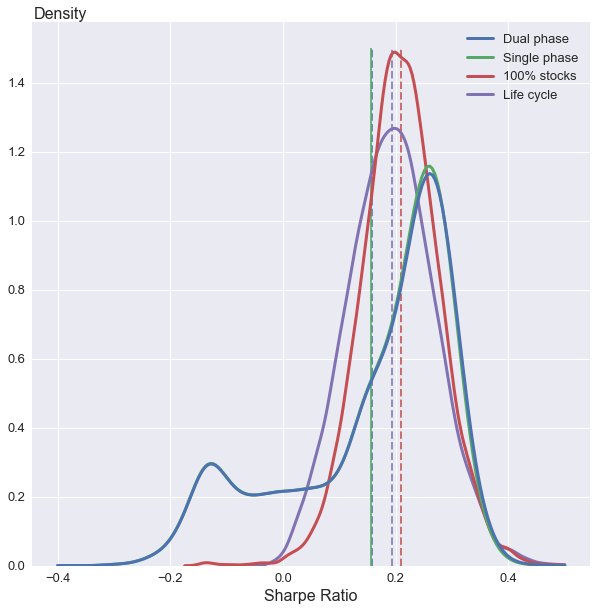

In [76]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.kdeplot(data = sharpe_ratio, linewidth = 3, clip= (-0.4, 0.5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_ylabel("Density", loc='top', rotation=0, labelpad=-80)
ax.set_xlabel("Sharpe Ratio")
for i, strategy in enumerate(['Dual phase', 'Single phase', '100% stocks', 'Life cycle']):
    if strategy == "Single phase":
        ax.vlines(sharpe_ratio[strategy].mean(), ymin= 0, ymax=1.5, color = cycle[i], linestyle="solid", alpha = 0.8, linewidth = 2)
    else:
        ax.vlines(sharpe_ratio[strategy].mean(), ymin= 0, ymax=1.5, color = cycle[i], linestyle="--", alpha = 0.8, linewidth = 2)
#f.savefig("Empirical/sharpe_distribution.png", bbox_inches = 'tight', pad_inches = 0.1)

In [9]:
sharpe.CE_ports(ports)

,dual_phase,single_phase,100,9050
Certainty Equivalent,"1,898,030.635446","1,988,516.720619","1,163,905.354848","1,584,289.854901"
